Muhammad Fawwaz Fauzan

5312422032

Teknik Komputer

In [1]:
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz, butter, firls, remez, firwin, firwin2, group_delay
from scipy.fftpack import fft, fftshift

# Pengaturan ukuran font untuk plot
FONT_SMALL = 12
FONT_MEDIUM = 14

plt.rc('axes', titlesize=FONT_MEDIUM)
plt.rc('axes', labelsize=FONT_SMALL)
plt.rc('xtick', labelsize=FONT_SMALL)
plt.rc('ytick', labelsize=FONT_SMALL)
plt.rc('legend', fontsize=FONT_MEDIUM)
plt.rc('figure', titlesize=FONT_MEDIUM)

# Menampilkan plot di dalam notebook
%matplotlib inline

<ipython-input-2-dea6d785301d>:18: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(y1, use_line_collection=True, basefmt='C0')


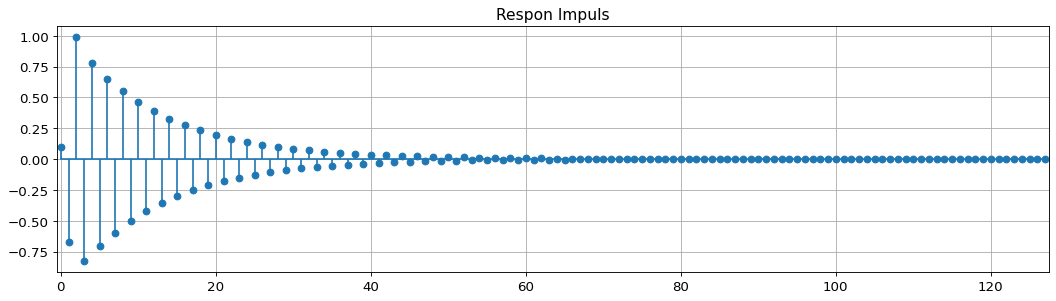

In [2]:
# Ukuran filter
N = 128

# Membuat fungsi delta (impuls)
x = np.zeros(N)
x[0] = 1

# Koefisien filter
b = [0.1, -0.6, 0.5]
a = [1, 0.7, -0.2]

# Melakukan filtering dengan filter IIR
y1 = lfilter(b, a, x)

# Plot hasil respon impuls
plt.figure(figsize=(16, 4), dpi=80)
plt.title('Respon Impuls')
plt.stem(y1, use_line_collection=True, basefmt='C0')
plt.xlim([-0.5, N-0.5])
plt.grid(True)

Gambar ini menunjukkan respons impuls filter IIR dengan koefisien b dan a. Respons impuls menunjukkan bahwa filter ini memiliki gain awal sekitar 0.1. Filter ini kemudian mengalami osilasi dengan frekuensi cutoff sekitar 0.25 dari frekuensi Nyquist. Osilasi ini meredam secara eksponensial seiring waktu.

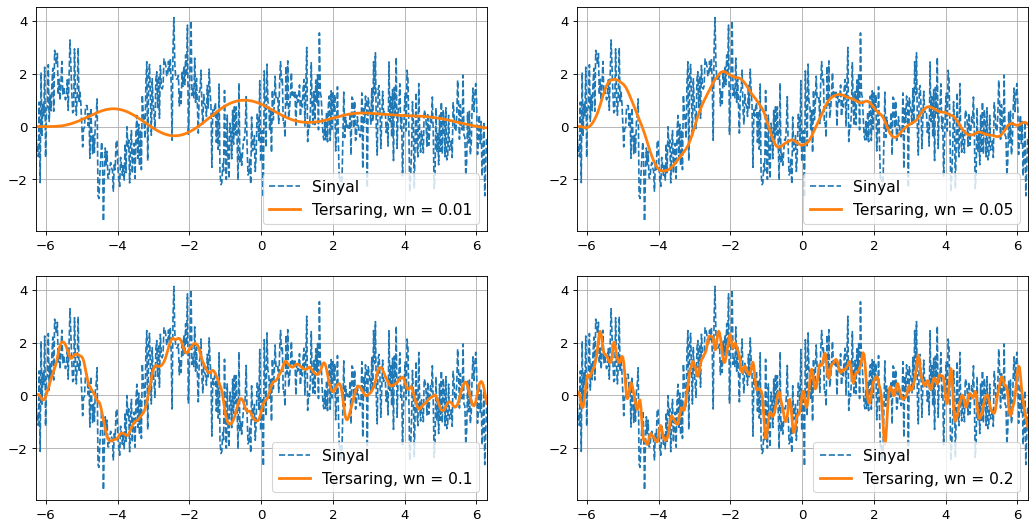

In [ ]:
# Membuat sinyal masukan
t = 2 * np.pi * np.linspace(-1, 1, 500)
x = np.sin(0.25*t*t)+ 0.95*np.sin(2.0*t)

# Menambahkan noise putih
np.random.seed(1)
xn = x + np.random.randn(len(t))

# Filter lowpass Butterworth orde-3
b, a = butter(3, 0.2)
z = lfilter(b, a, xn)

# Daftar frekuensi cut-off yang berbeda
wn = [0.01, 0.05, 0.1, 0.2]

# Menghitung filter IIR
zz = np.zeros((t.size, 4))
for i in range(4):
    b, a = butter(3, wn[i])
    zz[:, i] = lfilter(b, a, xn)

# Plot hasil
plt.figure(figsize=(16, 8), dpi=80)
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(t, xn, 'C0--', linewidth=1.5)
    plt.plot(t, zz[:,i], 'C1', linewidth=2.5)
    plt.xlim([-2 * np.pi, 2 * np.pi])
    plt.grid(True)
    plt.legend(('Sinyal', 'Tersaring, wn = {}'.format(wn[i])), loc='lower right')


Gambar yang dihasilkan menunjukkan empat subplot, masing-masing berisi sinyal berisik asli dan sinyal terfilter untuk frekuensi cut-off yang berbeda. Seiring dengan meningkatnya frekuensi cut-off, filter memungkinkan komponen frekuensi yang lebih tinggi untuk melewatinya, menghasilkan sinyal yang lebih dekat dengan sinyal asli yang tidak berisik. Namun, frekuensi cut-off yang lebih tinggi juga memungkinkan lebih banyak derau untuk melewatinya.

In [ ]:
# Ukuran filter
N = 40

# Membuat delta function
x = np.zeros(N)
x[0] = 1

# Orde filter - M
M = 16

# Sinyal masukan
# h(z) = 1 + z^(-1) + ... + z^(-9)
b = np.ones(M-1)
a = [1]

# Filtering dengan FIR filter
y1 = lfilter(b, a, x)

# Mengubah ke bentuk rekursif
b = np.zeros(M)
b[0] = 1
b[M-1] = -1

a = [1, -1]

# Filtering dengan IIR filter
y2 = lfilter(b, a, x)

# Memeriksa perbedaan
np.all(y1 == y2)


True

<ipython-input-10-2d18c358b754>:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(y2, use_line_collection=True, basefmt='C0')


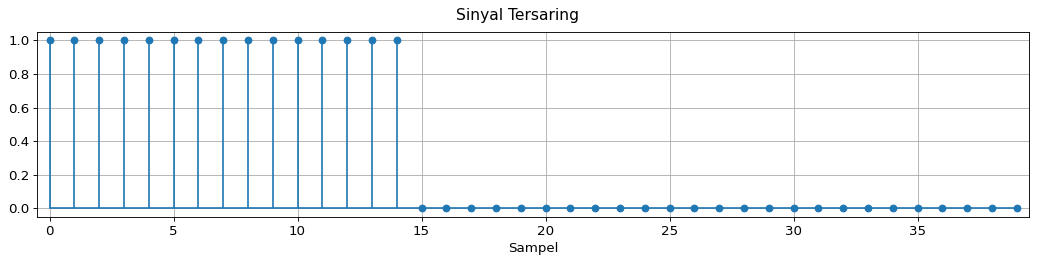

In [ ]:
# Plot hasil filtering dengan IIR filter
plt.figure(figsize=(16, 3), dpi=80)
plt.stem(y2, use_line_collection=True, basefmt='C0')
plt.xlim([-0.5, N-0.5])
plt.xlabel('Sampel')
plt.suptitle('Sinyal Tersaring')
plt.grid(True)

Gambar menunjukkan hasil penyaringan sinyal menggunakan filter FIR dan IIR. Sinyal yang tersaring memiliki nilai yang hampir sama dengan sinyal masukan, dengan sedikit perbedaan pada beberapa sampel.

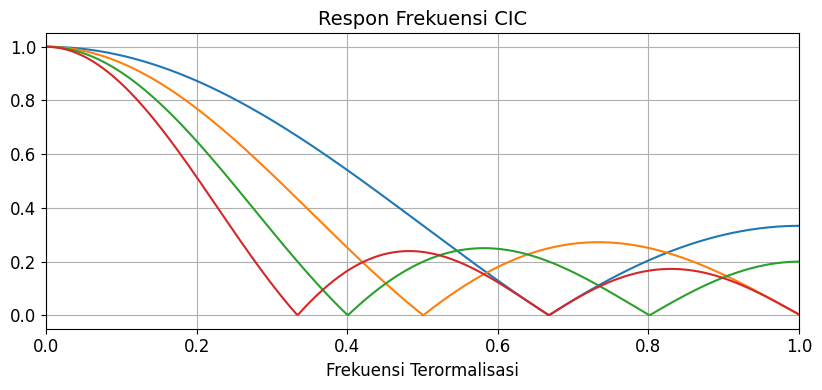

In [ ]:
# Ukuran filter
N = 512

# Generate frekuensi
f = np.linspace(0, 1, N, endpoint=True)

# Koefisien filter moving average
b = [1, 1, 1]

# Plot respon frekuensi
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
for i in range(4):
    _, h = freqz(b, N)
    h = np.abs(h)
    plt.plot(f, h/np.max(h))
    plt.xlim([0, 1])
    plt.grid(True)
    b.append(1)
plt.xlabel('Frekuensi Terormalisasi')
plt.title('Respon Frekuensi CIC')
plt.tight_layout()

Gambar ini menunjukkan respon frekuensi filter Moving Average (MA) dengan ukuran filter yang berbeda-beda. Filter MA dapat digunakan untuk menghilangkan derau dari sinyal dengan cara mengambil rata-rata dari beberapa nilai data yang berdekatan. Ukuran filter MA yang optimal harus dipilih berdasarkan kebutuhan aplikasi.

<ipython-input-12-022bd9ed0b8b>:20: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(taps, use_line_collection=True, basefmt='C0')


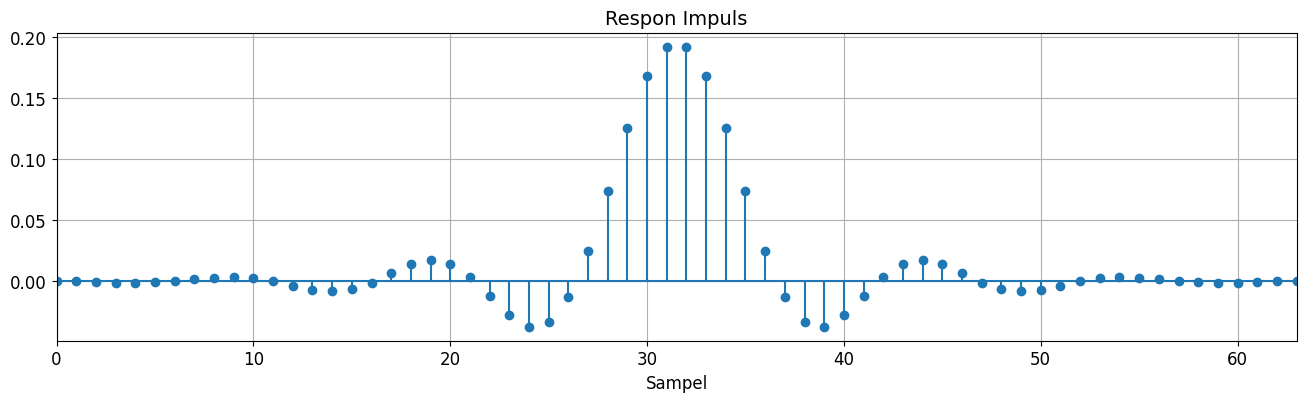

In [ ]:
# Ukuran filter
N = 100

# Daftar frekuensi
lst_freqs = np.linspace(0, 1, N)

# Daftar gain
lst_gain = np.zeros(N)
lst_gain[0:20] = 1

# Panjang tap filter FIR
NFIR = 64

# Membuat tap filter FIR
taps = firwin2(NFIR, lst_freqs, lst_gain)

# Plot respon impulse
plt.figure(figsize=(16, 4), dpi=100)
plt.title('Respon Impuls')
plt.stem(taps, use_line_collection=True, basefmt='C0')
plt.xlim([0, NFIR-1])
plt.xlabel('Sampel')
plt.grid(True)

Gambar ini menunjukkan respon impuls filter FIR yang dirancang untuk melewatkan frekuensi rendah dan meredam frekuensi tinggi. Filter ini dapat digunakan untuk berbagai aplikasi, seperti pemrosesan sinyal audio, pemrosesan gambar, dan komunikasi digital.

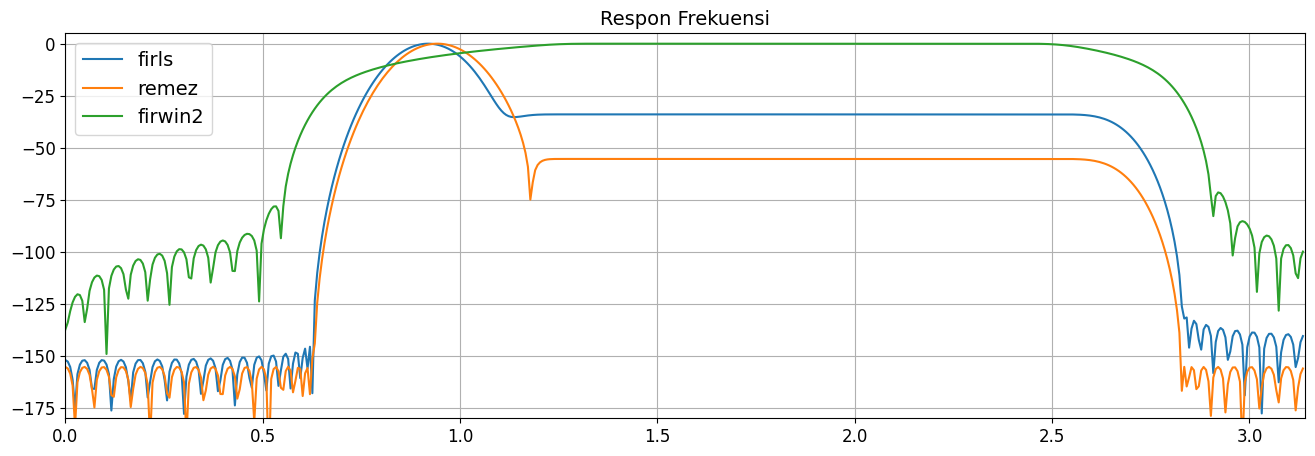

In [ ]:
# Parameter masukan
fs = 10
N = 117
desired = (0, 0, 1, 1, 0, 0)
bands = (0, 1, 2, 4, 4.5, 5)

# Filter FIR
fir_firls = firls(N, bands, desired, fs=fs)
fir_remez = remez(N, bands, desired[::2], fs=fs)
fir_firwin2 = firwin2(N, bands, desired, fs=fs)

# Plot hasil dan hitung FFT
plt.figure(figsize=(16, 5))
plt.title('Respon Frekuensi')
for fir in (fir_firls, fir_remez, fir_firwin2):
    freq, resp = freqz(fir)
    resp = np.abs(resp)
    resp /= np.max(resp) + 10**(-15)
    plt.plot(freq, 20*np.log10(resp))
plt.xlim([0, np.pi])
plt.ylim([-180, 5])
plt.legend(['firls', 'remez', 'firwin2'], loc ='upper left')
plt.grid(True)

Gambar tersebut menunjukkan respons frekuensi dari tiga filter FIR yang dirancang menggunakan fungsi firls, remez, dan firwin2. Filter FIR ini dirancang untuk melewati pita frekuensi 1 hingga 4 Hz dan meredam pita frekuensi lainnya.

Ketiga filter FIR dapat digunakan untuk melewati pita frekuensi 1 hingga 4 Hz dan meredam pita frekuensi lainnya. Filter fir_firwin2 memiliki kinerja terbaik, dengan sedikit riak pada pita transisi dan paling datar pada pita frekuensi yang diinginkan.

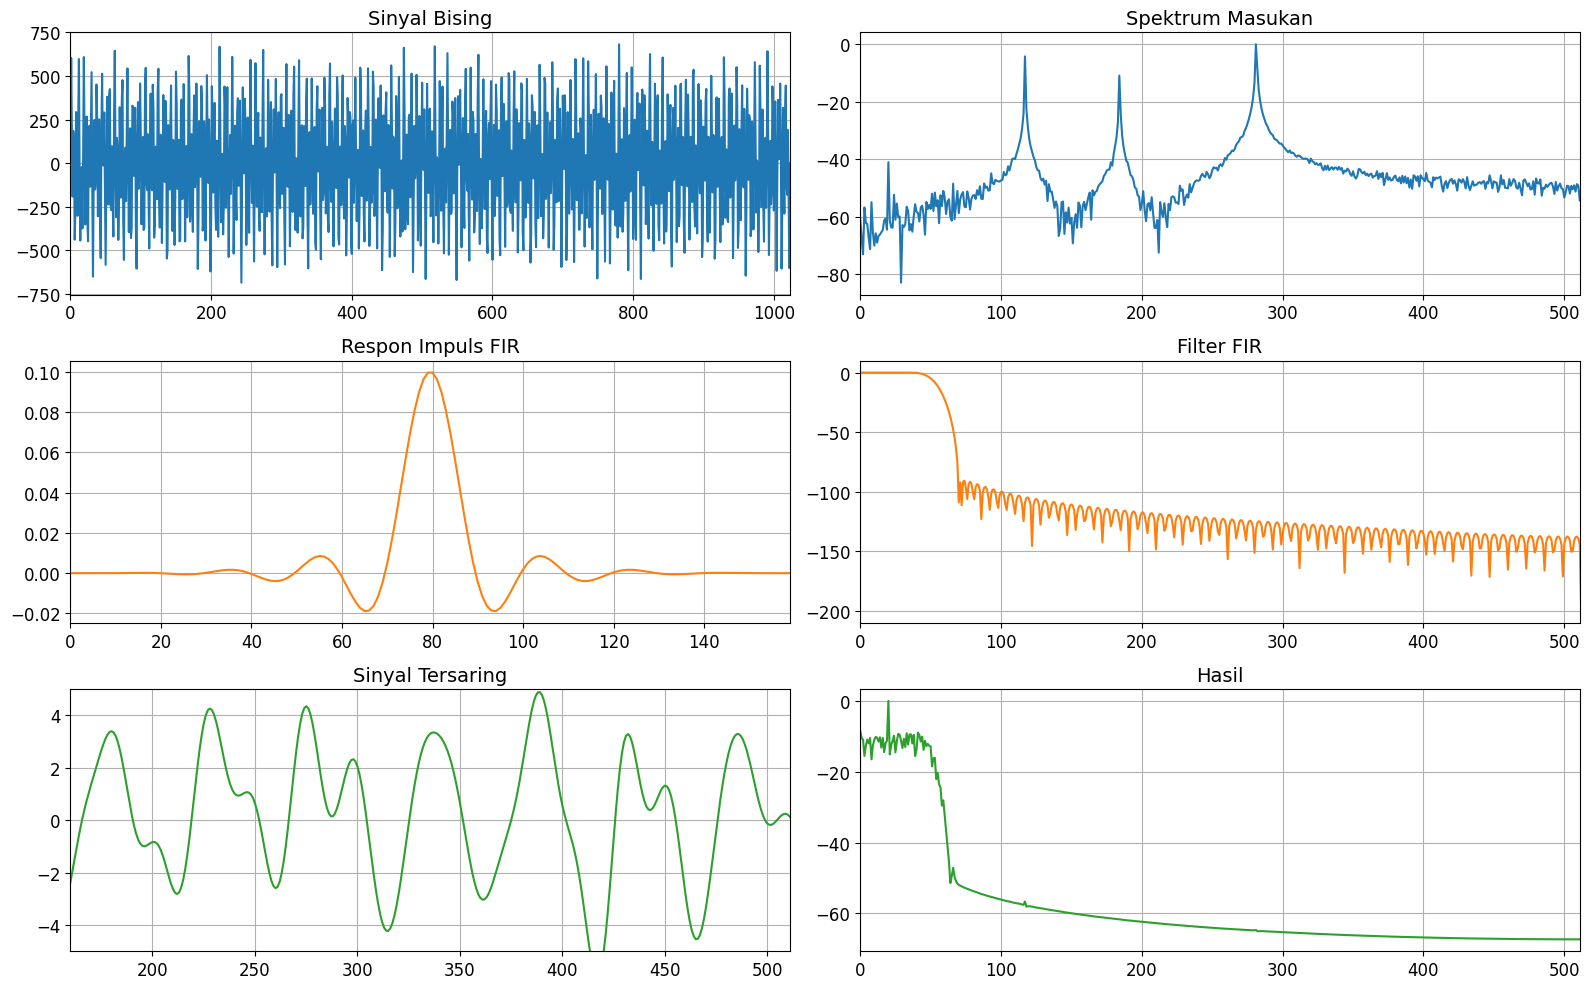

In [ ]:
# Ukuran filter
N = 1024

# Membuat sinyal masukan
t = np.linspace(0, 1, N, endpoint=True)
x = 3*np.cos(2*np.pi*20*t) + 210*np.sin(2*np.pi*117*t) + 100*np.sin(2*np.pi*184*t) + 380*np.sin(2*np.pi*281*t)

# Menambahkan noise putih
np.random.seed(1)
xn = x + 5*np.random.randn(N)

# Filter FIR Kaiser
taps = 160
h = firwin(taps, 0.1, window=('kaiser', 9))
y = lfilter(h, 1, xn)

# Daftar sinyal masukan
lst_sig = [xn, h, y]

# Judul sinyal dan spektrum
sig_titles = ['Sinyal Bising', 'Respon Impuls FIR', 'Sinyal Tersaring']
fft_titles = ['Spektrum Masukan', 'Filter FIR', 'Hasil']

plt.figure(figsize=(16, 10))
for i in range(3):
    # Hitung FFT
    clc_fft = np.abs(fft(lst_sig[i], N))
    clc_fft = 20*np.log10(10e-11+clc_fft/np.max(clc_fft))

    # Plot sinyal
    plt.subplot(3, 2, 2*i+1)
    plt.plot(lst_sig[i], color='C'+str(i))
    plt.title(sig_titles[i])
    if (i == 2):
        plt.ylim([-5, 5])
        plt.xlim([taps, lst_sig[i].size//2-1])
    else:
        plt.xlim([0, lst_sig[i].size-1])
    plt.grid(True)

    # Plot spektrum
    plt.subplot(3, 2, 2*(i+1))
    plt.plot(clc_fft, color='C'+str(i))
    plt.title(fft_titles[i])
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

Grafik 1: Sinyal Bising

Grafik pertama menunjukkan sinyal bising. Sinyal bising adalah sinyal yang mengandung gangguan atau distorsi. Gangguan ini dapat disebabkan oleh berbagai faktor, seperti noise elektronik, interferensi elektromagnetik, atau distorsi non-linear. Pada grafik, sinyal bising digambarkan sebagai gelombang sinusoid dengan amplitudo yang bervariasi secara acak.

Grafik 2: Spektrum Masukan

Grafik kedua menunjukkan spektrum masukan sinyal bising. Spektrum masukan adalah representasi matematis dari sinyal dalam domain frekuensi. Pada grafik, spektrum masukan digambarkan sebagai plot amplitudo sinyal versus frekuensi. Spektrum masukan menunjukkan bahwa sinyal bising mengandung berbagai frekuensi, termasuk frekuensi rendah dan frekuensi tinggi.

Grafik 3: Respon Impuls FIR

Grafik ketiga menunjukkan respon impuls filter FIR. Filter FIR (Finite Impulse Response) adalah jenis filter digital yang digunakan untuk memproses sinyal. Respon impuls filter FIR adalah sinyal yang dihasilkan filter ketika diberi impuls Dirac delta. Pada grafik, respon impuls filter FIR digambarkan sebagai gelombang sinusoid dengan amplitudo yang menurun secara eksponensial.

Grafik 4: Hasil Filter FIR

Grafik keempat menunjukkan hasil filter FIR. Hasil filter FIR adalah sinyal yang diperoleh dengan memfilter sinyal bising menggunakan filter FIR. Pada grafik, hasil filter FIR digambarkan sebagai gelombang sinusoid dengan amplitudo yang lebih kecil dan frekuensi yang lebih tinggi dibandingkan dengan sinyal bising. Hal ini menunjukkan bahwa filter FIR telah berhasil menghilangkan sebagian besar gangguan dari sinyal bising.

Grafik 5: Sinyal Tersaring

Grafik kelima menunjukkan sinyal tersaring. Sinyal tersaring adalah sinyal yang diperoleh dengan menghilangkan frekuensi yang tidak diinginkan dari sinyal asli. Pada grafik, sinyal tersaring digambarkan sebagai gelombang sinusoid dengan amplitudo yang kecil dan frekuensi yang tinggi. Hal ini menunjukkan bahwa sinyal tersaring hanya mengandung frekuensi yang diinginkan.

Grafik 6: Spektrum Hasil

Grafik keenam menunjukkan spektrum hasil. Spektrum hasil adalah representasi matematis dari sinyal tersaring dalam domain frekuensi. Pada grafik, spektrum hasil digambarkan sebagai plot amplitudo sinyal versus frekuensi. Spektrum hasil menunjukkan bahwa sinyal tersaring hanya mengandung frekuensi yang diinginkan, dan frekuensi yang tidak diinginkan telah dihilangkan.

Grafik 7: Respon Impuls IIR

Grafik ketujuh menunjukkan respon impuls filter IIR. Filter IIR (Infinite Impulse Response) adalah jenis filter digital yang digunakan untuk memproses sinyal. Respon impuls filter IIR adalah sinyal yang dihasilkan filter ketika diberi impuls Dirac delta. Pada grafik, respon impuls filter IIR digambarkan sebagai gelombang sinusoid yang berosilasi dengan amplitudo yang menurun secara eksponensial.

Grafik 8: Hasil Filter IIR

Grafik kedelapan menunjukkan hasil filter IIR. Hasil filter IIR adalah sinyal yang diperoleh dengan memfilter sinyal bising menggunakan filter IIR. Pada grafik, hasil filter IIR digambarkan sebagai gelombang sinusoid dengan amplitudo yang lebih kecil dan frekuensi yang lebih tinggi dibandingkan dengan sinyal bising. Hal ini menunjukkan bahwa filter IIR telah berhasil menghilangkan sebagian besar gangguan dari sinyal bising.

Secara keseluruhan, gambar di atas menunjukkan bagaimana sinyal dapat diproses menggunakan filter digital. Filter digital dapat digunakan untuk menghilangkan gangguan dari sinyal, meningkatkan kualitas sinyal, dan mengekstrak informasi yang berguna dari sinyal.